<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* MBC 마켓에서 이번엔 럭키백을 패션분야에 접목을 시키려고 한다.
* 패션분야이기 때문에 상품개수가 늘어나고 어종이 아닌 일반잡화용으로 제공하기로 하였다.

### 딥러닝의 시작 인공신경망
* MNIST 데이터셋 :  손으로 쓴 0~9까지의 숫자로 이루어져 있음
 > https://en.wikipedia.org/wiki/MNIST_database
* 패션 MNIST 데이터셋 : 숫자대신 패션 아이템으로 이루어짐

* 실행마다 동일한 결과를 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.

In [1]:
import tensorflow as tf #텐서플로
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 케라스 패키지 임포트
from tensorflow import keras

# load_data()가 훈련세트와 테스트세트로 데이터를 나누어 반환(inpit과 target의 쌍으로 이루어짐)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# /sample_data/mmist_test.csv, /sample_data/mmist_train_small.csv

In [2]:
print(train_input.shape, train_target.shape)
# 트레이닝 세트(6만개, 28 가로, 28세로), 타겟 6만개(1차원 배열)
# 해상도 28*28 픽셀

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)
# 테스트 세트(만개, 28 가로, 28세로), 타겟 1만개(1차원 배열)

(10000, 28, 28) (10000,)


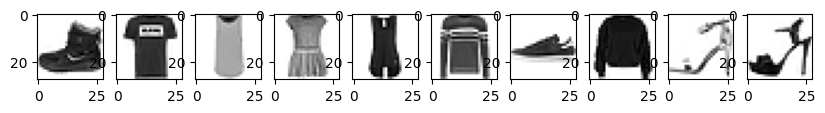

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('on')
plt.show()

In [5]:
print([train_target[i] for i in range(10)]) # 샘플 타겟 확인
# 0~9까지 타겟이 있음
# 0 티셔츠(T-shirt/top), 1 바지(Trouser), 2스웨터(Pullover), 3드레스(Dress), 4코트(Coat),
# 5샌달(Sandal), 6셔츠(Shirt), 7스니커즈(Sneaker), 8가방(Bag), 9앵클부츠(Ankle boot)

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


* 로지스틱 회귀로 패션 아이템 분류하기
* 6만개 전체를 한번에 훈련하는 것보다 샘플 1개씩 꺼내서 모델을 훈련해보자.
* 확률적 경사하강법 : SDGClassifier(분류용)
* SDGClassifier를 사용할 때 표준화 전저리된 데이터를 사용
* 확률적 경사하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
* 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실함수의 경사를 내려올 수 없음
* 패션 MNIST의 경우 흑백이기에 0 ~ 255 사이의 정수값을 가짐 -> 255로 나누어 0~1 사이 값이 정규화 진행(양수값으로 이루어진 이이미 전처리용)

In [7]:
# reshape로 2차원 배열을 1차원 배열로 펼침
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)
# SDGClassifier는 2차원 지원 안함 28*28 = 784

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state=42)
# max_iter=5 5번 반복, 교차검증
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))    # 5번 반복에 대한 테스트 평균
# time : 40s
# 81.94%

0.8194166666666666


* 로지스틱 회귀
```
  z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
  ```
* 선형방정식
```
  z_티셔츠 = a * (픽셀1) + b * (픽셀2) + c * (픽셀3) + d * (픽셀4) + ... + e * (픽셀784) + f(절편)
  ```

* 바지에 대한 출력은 티셔츠와 다른 값을 사용해야 함(티셔츠와 다름)
```
  z_바지 = a1 * (픽셀1) + b1 * (픽셀2) + c1 * (픽셀3) + d1* (픽셀4) + ... + e1 * (픽셀784) + f1(절편)
  ```

* 나머지 클래스에 대한 선형방정식도 동일 -> 10개의 클래스에 대한 선형방정식을 모두 계산함
* 다음 단계인 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음

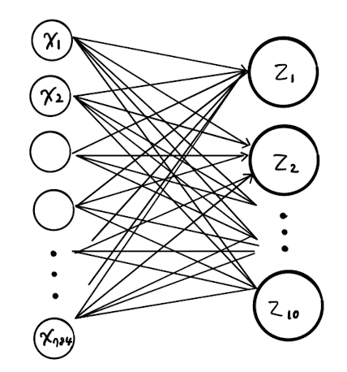

### 인공신경망(artificial neural network, ANN)
* 인공신경망을 사용하여 패션아이템 분류 문제의 성능을 높여보자.
> https://todayisbetterthanyesterday.tistory.com/41

* z_티셔츠~ 클래스 10개인 z_10 까지 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종값은 출력측(output Layer)

* 인공신경망의 z값 계산하는 단위는 뉴런(Neuraon)이라고 부름 -> 선형계산을 진행(대부분 유닛이라고 부름)

* 픽셀 1 ~ 784번 픽셀까지를 입력층(input layer)이라고 부름

* z_1 을 만들기 위해서 픽셀 1인 x_1에 곱해지는 가중치는 w_1.1.... 10개의 뉴런
* 사람뇌에 있는 뉴런과 다름(무언가를 만들어 내는 것이 아니라 알고리즘의 일종)
* 확률적 경사하강법을 사용한 로지스틱 회귀모델이 가장 간단한 인공신경망이라면 인공신경망을 만들어도 성능이 좋아지지 않는다.
* 이미 인경신경망을 만들었다.
* 확률적 경사하강법을 사용한 로지스틱회귀는 가장 간단한 인공신경망 모델이다.

* 뉴런 : 정답(target)

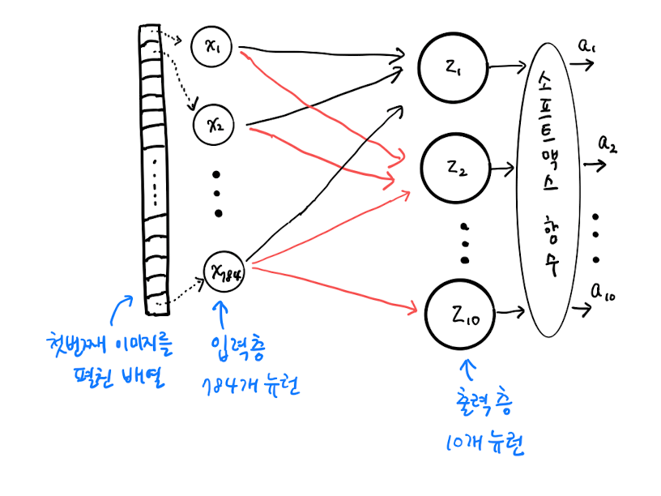

* 딥러닝 라이브러리에서 인기높은 텐서플로를 사용해보자

#### 텐서플로(TensorFlow)
* 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리 -> 알파고 시절
* 텐서플로우 2.X 버전이 2019년 9월에 릴리스 됨

In [9]:
import tensorflow as tf
from tensorflow import keras # 케라스 : 고수준 api

* 딥러닝 라이브러리는 GPU(그래픽카드) 사용하여 인공신경망을 훈련함(GPU는 벡터와 행렬 연산으로 3D 연산에 최적화 되어 있음)
* 곱셈과 덧셈이 많이 수행되는 인공신경망의 속도를 높여준다.
* 케라스 라이브러리는 직접 GPU 연산을 수행하지 않는다.
* 대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용
* 텐서플로우가 케라스 백엔드로 사용할 수 있다. -> 멀티-백엔드 케라스라고 부름
* 케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛대로 골라서 사용할 수 있다.(직관적이고 사용하기 편함)

* 인공신경망으로 모델 만들기
* 앞에서 만든 train_scaled, train_target을 사용
* 인공신경망에서는 교차검증을 사용하지 않고 검증세트를 별도로 덜어내서 사용
  * 이유1 : 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적임
  * 이유2 : 교차검증을 수행하기에는 훈련시간이 너무 오래걸림 -> fit 시간이 몇시간, 몇일 걸릴 수 있음
  

In [10]:
from sklearn.model_selection import train_test_split

tr_scaled, val_scaled, tr_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(tr_scaled.shape, tr_target.shape)   # 훈련세트 48,000
print(val_scaled.shape, val_target.shape)       # 검증세트 12,000

(48000, 784) (48000,)
(12000, 784) (12000,)


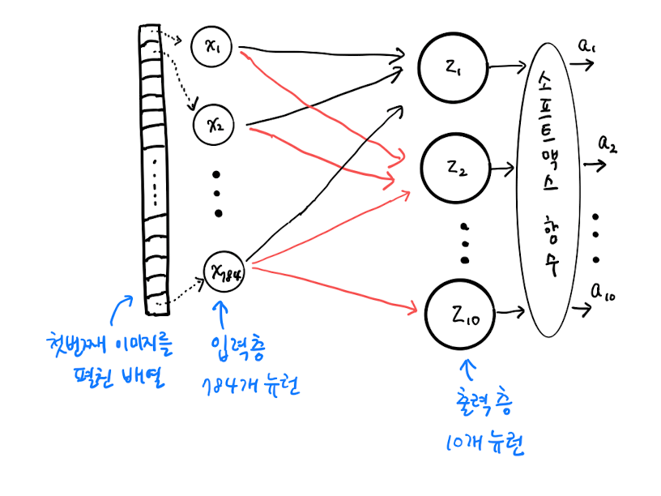

#### 밀집층(dense layer)
* 딥러닝에서는 다양한 종류의 층을 추가하는 식으로 모델을 만듦
* 이번 장에서는 Dense 층을 사용 :  밀집층, 완전연결층, fully connected layer

* 10개의 유닛 -> 다중분류이므로 활성화 함수는 소프트맥스, 입력값은 784개의 원소로 이루어진 1차원 배열
* **만약 이진분류이면 시그모이드 함수를 사용

* 케라스는 첫번째 층에 입력크기를 넣어야 함(784)
* 그 다음에 추가되는 충은 자동으로 계산되기 때문에 넣을 필요 없음
* 케라스 모델은 Sequential 클래스로 만듦

* 인공신경망의 오른쪽에 놓은 층을 만듦
* 10개의 패션아이템을 분류하기 위해서 10개의 뉴런으로 구성
* 케라스의 레이어 패키지 안에는 다양한 층이 존재함
* 가장 기본이 되는 층이 밀집층(dense layer)


* 밀집층(dense layer) : 784개의 픽셀과 10개의 뉴런이 모두 연결된 선이라는 뜻
* 총 784(입력층) * 10(출력층) = 7840 개의 연결선
* 이런 층을 뉴런이 모두 연결하고 있어 완전연결층(fully connected layer)이라고 부름

In [11]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#                         뉴런개수, 뉴런에 적용함수, 입력크기
# activation='softmax' : 출력되는 값을 확률로 바꿈-> 다중분류
# activation='sigmoid' : 이진분류
# 입력의 크기는 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 이제 밀집층을 가진 신경망 모델을 만들자.
model = keras.Sequential([dense])
# 밀집층을 가진 신경망 모델을 만듦, Sequential(순차적 구조) 클래스를 사용
# Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달
# 여기서 만든 model 객체가 바로 신경망 모델

* 아래 모델 * 60000

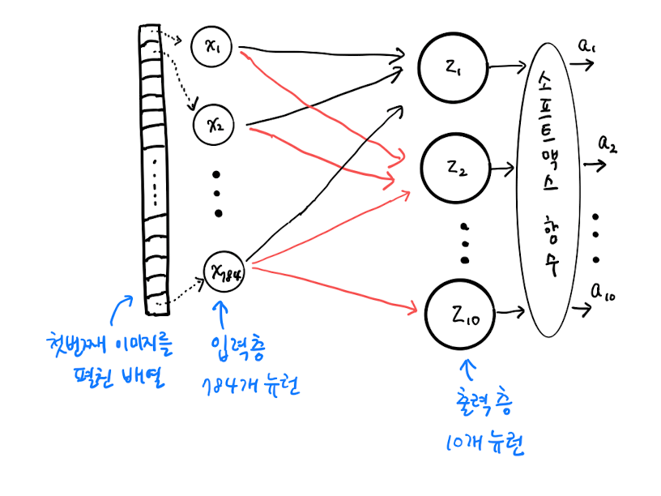

* 소프트맥스와 같이 뉴런의 선형방정식 계산 결과에 적용되는 함수를 활성화 함수라고 함
* 위 그림을 보면 a 표시되어 있음

### 인공신경망으로 패션 아이템 분류하기
* 케라스 모델 훈련 전 설정단계
  * model 객체의 compile() 메서드 수행
  * 손실함수 loss = 'sparse_categorical_crossentropy'(히소 다중분류 손실함수) -> 정수 타깃)
  * 'sparse_binary_crossentropy'(히소 이진분류 손실함수) -> 이진 타깃
  * 측정값 metrics = ['accuracy']-> 정확도(에큐러시)의 지표가 됨

In [20]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 케라스는 자동으로 에포크마다 손실을 기록한다. (추가로 정확도를 기록하기 위해 metrics)

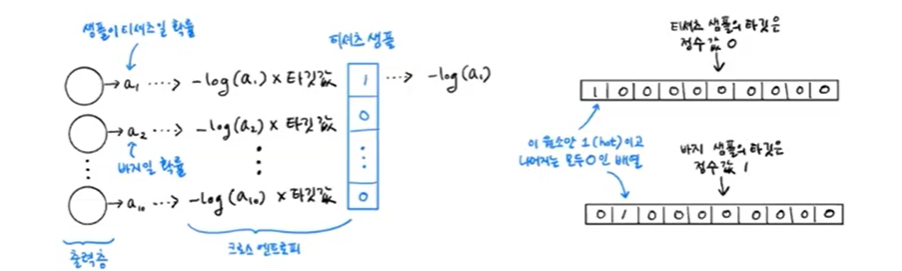

In [14]:
print(tr_target[:10])   # 정수형으로 타깃 생성 -> 원-핫 인코딩

[7 3 5 8 6 9 3 3 9 9]


In [21]:
model.fit(tr_scaled, tr_target, epochs=5)
# 훈련시작(에포크 5로 5번 훈련중)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8537 - loss: 0.4337


In [22]:
# 에포크마다 걸린시간, 정확도(accuracy),손실(loss)
# 0.8537 높은 점수를 받음

# 케라스 모델의 성능평가하는 메서드 evaluate
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

#### 사이킷런과 케라스 모델 비교

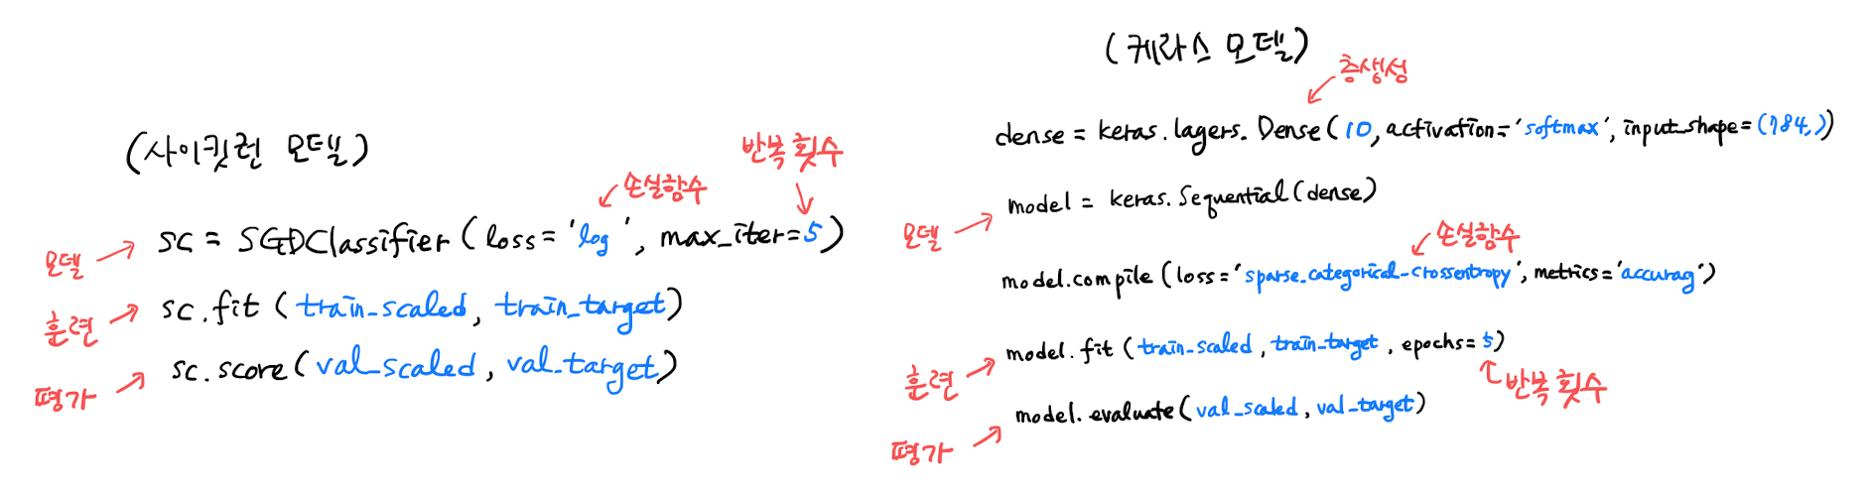